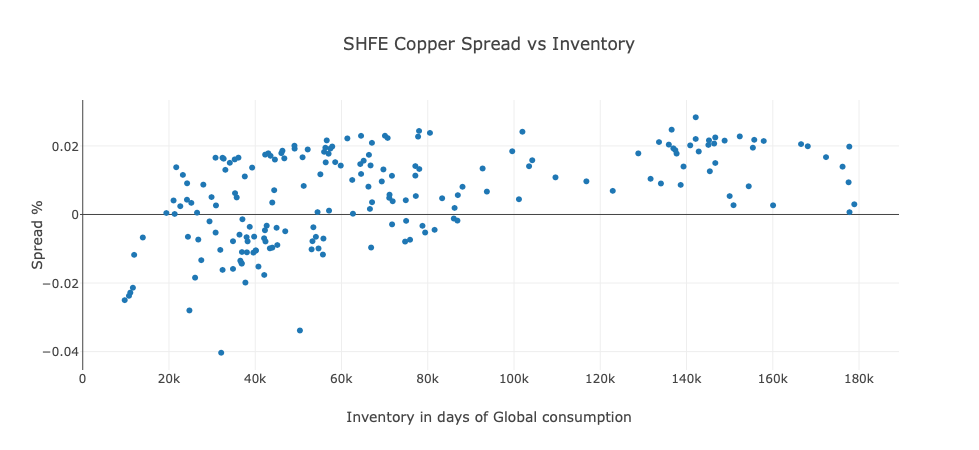

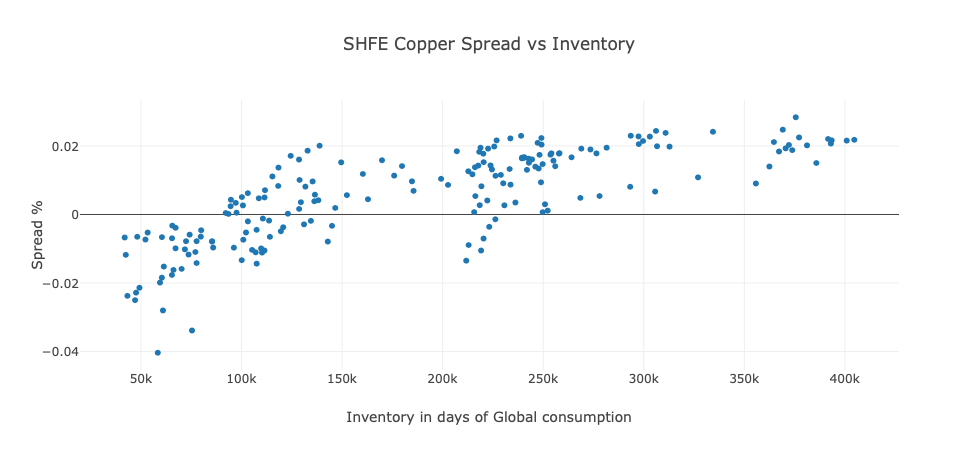

In [64]:
#shfe = pd.read_pickle('data/SCF-warehouse-weekly').dropna()['2014':]
#comb = pd.DataFrame(pd.read_pickle('data/LME-SHFE-stocks'), columns=['stock'])['2014':]
#lme = pd.read_pickle('data/LME-stocks')['2015':]

px = pd.read_pickle('data/SCFc-fc-px').dropna()
spread = px['SCFc0%d'%7]/px.SCFc01-1

inv = pd.read_pickle('data/inventory.pkl')['2015':]
inv['psi'] = spread
inv = inv.resample('W').mean()
# ax = inv.plot(y='Total')
# ax = inv.plot(y='SHFE Deliverable', ax=ax)
# ax = inv.plot(y='SHFE On Warrant', ax=ax)
# ax = inv.plot(y='COMEX Total Stock', ax=ax)
# ax = inv.plot(y='LME Total Stock', ax=ax)





#comb['psi'] = spread
#comb = comb.dropna()

#lme['psi'] = spread
#lme = lme .dropna()
#shfe['psi'] = spread


#px = pd.read_pickle('data/CMCUc-fc-px').dropna()
#v['psi'] = px[6]/px[0]-1

#v = v['2014':'2019']

#corr = v.Deliverable.corr(v.psi, method='spearman')
#print(corr, utl.rCI(corr, len(v)))

#ax = v.psi.plot.kde()
#v = v['2008':'2015']

iplot(go.Figure(data=[go.Scatter(x=inv['SHFE On Warrant'], y=inv.psi, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))
iplot(go.Figure(data=[go.Scatter(x=inv['COMEX Total Stock']+inv['SHFE On Warrant'], y=inv.psi, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))

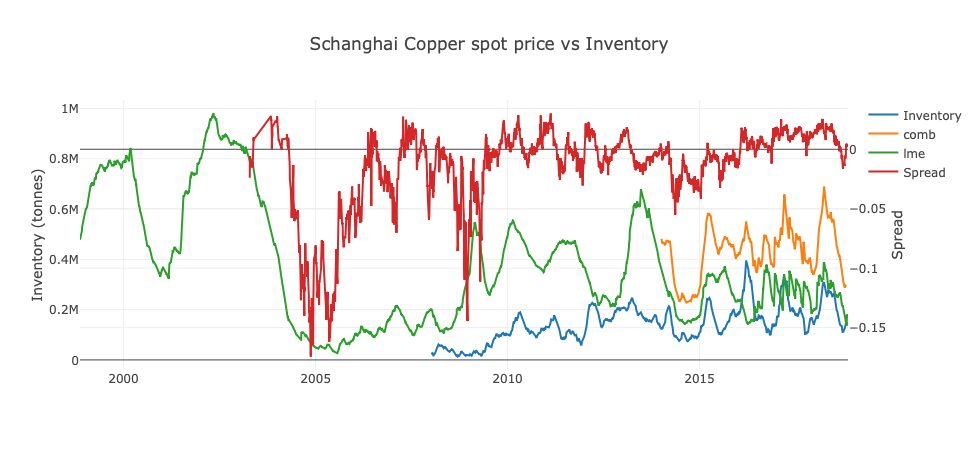

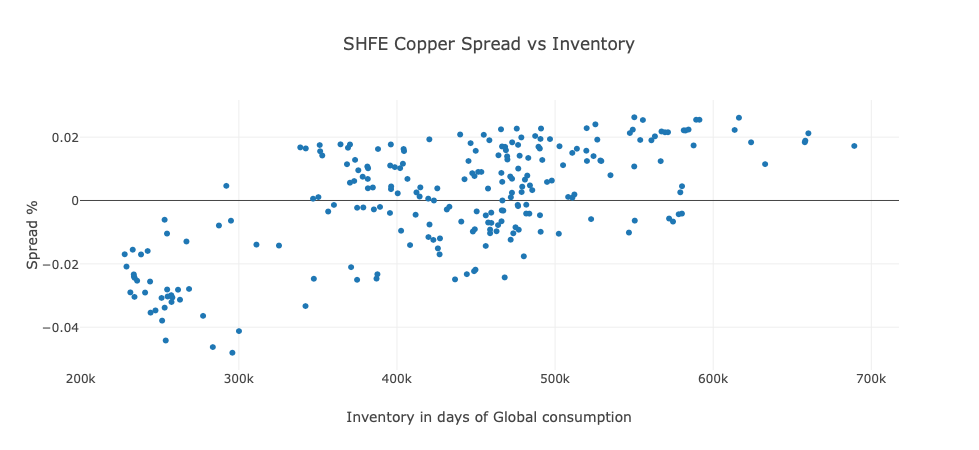

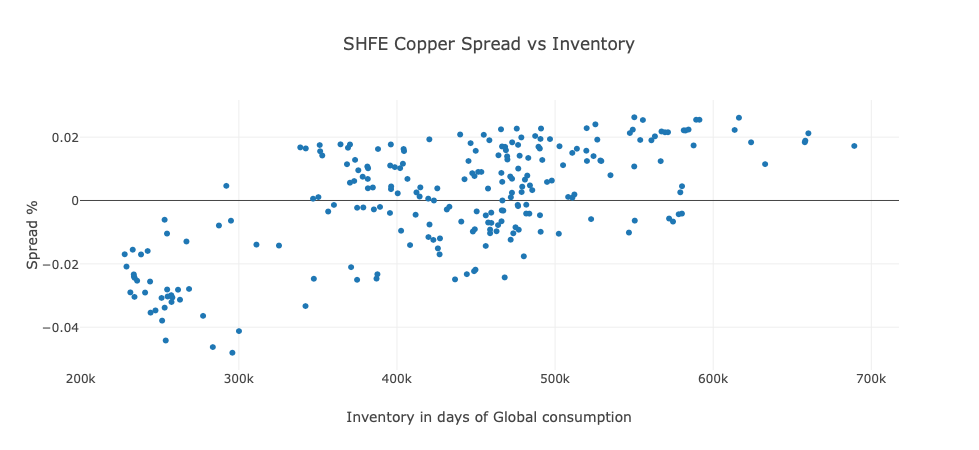

In [100]:
psi = pd.read_pickle('data/SCFc-fc-spread').dropna()
w = pd.read_pickle('data/SCF-warehouse-weekly').dropna()
lme = pd.read_pickle('data/LME-stocks')

comb = pd.DataFrame(pd.read_pickle('data/LME-SHFE-stocks'), columns=['stock'])['2014':]
comb['psi'] = psi.SCFc07

iplot(go.Figure(data=[
                      go.Scatter(x=w.index, y=w.Deliverable, name='Inventory'),
                      go.Scatter(x=comb.index, y=comb.stock, name='comb'),
                      go.Scatter(x=lme.index, y=lme.volume, name='lme'),
                      go.Scatter(x=psi.index, y=psi.SCFc06, yaxis='y2', name='Spread'),
                     ],
                layout=go.Layout(
                    title='Schanghai Copper spot price vs Inventory', 
                    yaxis={'title':'Inventory (tonnes)'}, 
                    yaxis2=dict(title='Spread', overlaying='y', side='right'))))

iplot(go.Figure(data=[go.Scatter(x=comb.stock, y=comb.psi, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))
iplot(go.Figure(data=[go.Scatter(x=comb.stock, y=comb.psi, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))




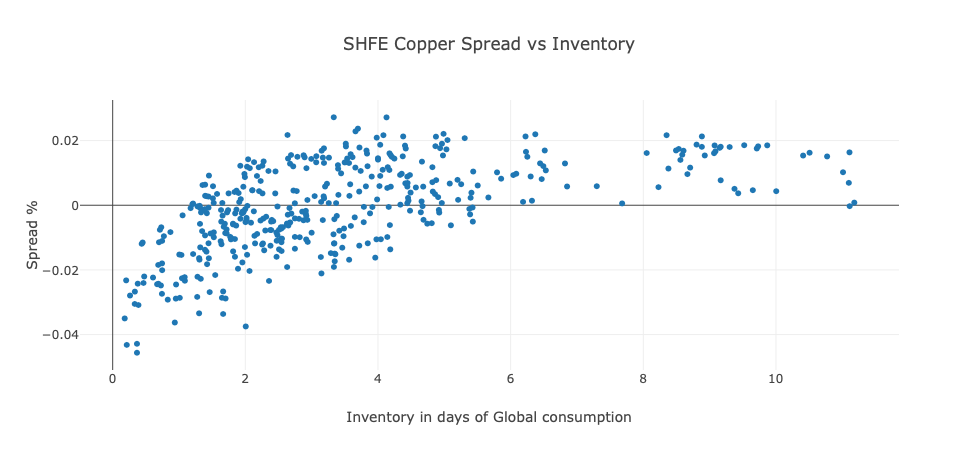

In [2]:
scatter= pd.merge(
    pd.read_pickle('data/SCF-warehouse-weekly').dropna(),
    pd.read_pickle('data/SCFc-fc-spread').dropna(),
    left_index=True, right_index=True)['2010':'2019']
iplot(go.Figure(data=[go.Scatter(x=scatter.OnWarrant/16000, y=scatter.SCFc06, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))


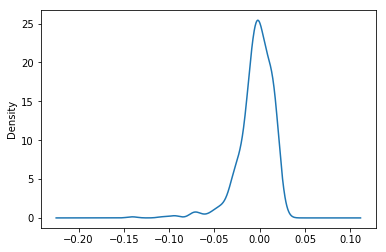

In [23]:
scatter.SCFc06.plot.kde()

In [5]:
scf.Deliverable.tail()

Date
2018-09-21   -23537.0
2018-09-28      966.0
2018-10-12    13705.0
2018-10-19    15089.0
2018-10-26     8154.0
Name: Deliverable, dtype: float64

In [30]:

df = pd.merge(wh.diff(), fc_c_s, left_index=True, right_index=True).dropna()['2008':'2015']

import scipy.stats as stats
r = (df.Deliverable).corr(df.SCFc06)
r_z = np.arctanh(r)
se = 1/np.sqrt(len(df.Deliverable)-3)
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo, hi = np.tanh((lo_z, hi_z))
print(r_z, lo, hi)

stats.pearsonr(df.Deliverable, df.SCFc06)
#print((df.Deliverable+df.OnWarrant)[:'2015'].corr(df['SCFc06'][:'2015']))
#print(df.OnWarrant[:'2015':].corr(df['SCFc06'][:'2015']))
#print(df.Deliverable.corr(df['SCFc06']))
#print(df.OnWarrant.corr(df['SCFc06']))



0.18602034469788503 0.08447124343262614 0.27971022085137937


(0.18390397749923262, 0.00033121878065309185)

In [69]:
wh = pd.read_pickle('data/SCF-warehouse-weekly')
df = wh.groupby(by=[wh.index.year.rename('year'), wh.index.month.rename('month')]).mean()
date = pd.to_datetime(dict(year=df.index.get_level_values(0), month=df.index.get_level_values(1), day=1))
df = df.reset_index()
print(df.index)

RangeIndex(start=0, stop=130, step=1)


In [62]:
df

OnWarrant    Deliverable
year month                              
2008 1       11647.250000   23762.000000
     2       14960.750000   36376.500000
     3       24745.000000   56590.000000
     4       24480.500000   55497.250000
     5       21653.200000   47847.800000
     6       15078.250000   34803.500000
     7       17376.000000   39587.500000
     8       12366.800000   26518.800000
     9        9181.500000   16467.000000
     10      12660.000000   29078.000000
     11      10036.500000   20041.750000
     12       8294.333333   19196.000000
2009 1        9266.000000   18249.000000
     2       10407.500000   30217.750000
     3       10351.250000   32448.000000
     4        8463.000000   20221.333333
     5        8639.200000   29231.600000
     6       11762.500000   57687.750000
     7       12386.000000   54369.600000
     8       18391.250000   76954.000000
     9       21367.250000   96860.250000
     10      21931.600000   95742.000000
     11      32106.750000  104474.000000
     12      36857.666667  101587.666667
2010 1       32494.000000   99480.000000
     2       30762.666667  126983.000000
     3       46424.500000  157163.750000
     4       76954.250000  183195.250000
     5       65067.250000  169930.500000
     6       40069.250000  137984.750000
...                   ...            ...
2016 5      129275.000000  269481.000000
     6       73896.000000  178668.250000
     7       70315.400000  168332.400000
     8       62326.750000  169556.000000
     9       32928.200000  134057.400000
     10      23693.333333  113873.666667
     11      27258.750000  122247.750000
     12      42253.000000  138462.800000
2017 1       64843.600000  188237.400000
     2      112575.750000  271785.250000
     3      165137.200000  317168.600000
     4      119343.000000  263907.250000
     5       71545.500000  201291.750000
     6       57140.200000  191883.200000
     7       57209.250000  178998.250000
     8       65910.250000  197506.500000
     9       52853.400000  153529.000000
     10      28375.666667  108267.000000
     11      27657.750000  150089.250000
     12      35478.600000  151992.200000
2018 1       47296.000000  167077.250000
     2       69495.250000  193754.500000
     3      119618.200000  287804.400000
     4      144242.333333  264103.666667
     5      148265.250000  270274.750000
     6      141115.800000  260132.600000
     7      119172.250000  225440.250000
     8       67482.600000  160718.200000
     9       38108.500000  123410.250000
     10      51791.666667  138477.333333

[130 rows x 2 columns]

Spread = (F(t, T) - S(t))/(S(t)

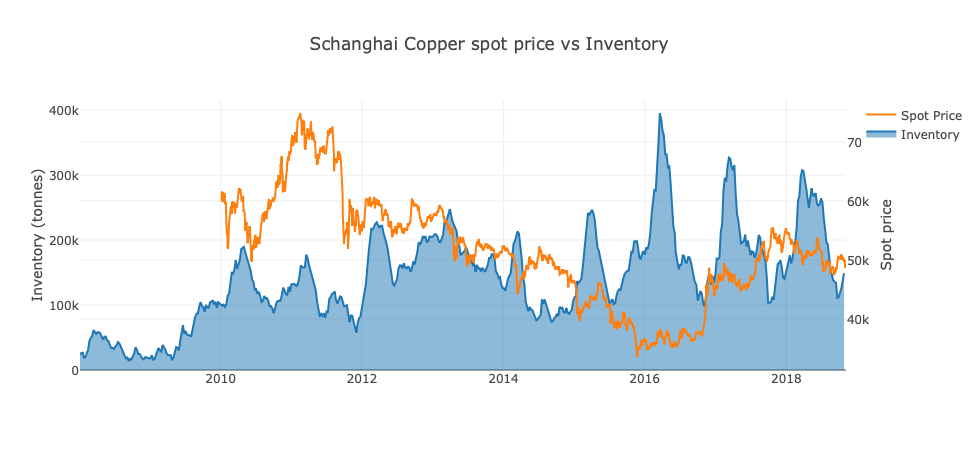

In [30]:
iplot(go.Figure(data=[go.Scatter(x=wh.index, y=wh.Deliverable, fill='tonexty', name='Inventory'),
                      go.Scatter(x=fc_p.index, y=fc_p['SCFc01'], yaxis='y2', name='Spot Price'),
                     ],
                layout=go.Layout(title='Schanghai Copper spot price vs Inventory', yaxis={'title':'Inventory (tonnes)'}, 
                                 yaxis2=dict(title='Spot price', overlaying='y', side='right'))))

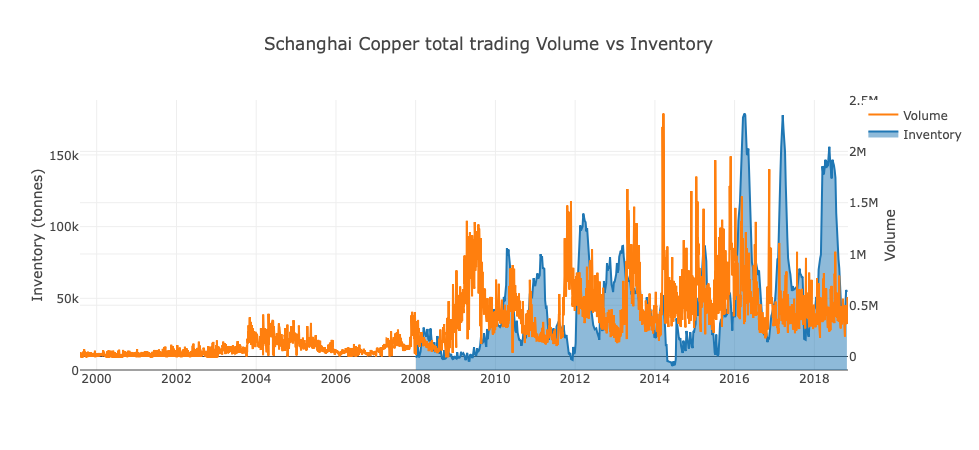

In [119]:
v = pd.read_pickle('data/SCFc-volume')
wh = pd.read_pickle('data/SCF-warehouse-weekly')
iplot(go.Figure(data=[
    go.Scatter(x=wh.index, y=wh.Deliverable, fill='tonexty', name='Inventory'),
    go.Scatter(x=v.index, y=v.Total, yaxis='y2', name='Volume')],
               layout=go.Layout(title='Schanghai Copper total trading Volume vs Inventory', yaxis={'title':'Inventory (tonnes)'}, 
                                 yaxis2=dict(title='Volume', overlaying='y', side='right'))))
